<a href="https://colab.research.google.com/github/gowrishankar-manu/data-structures-algorithms-python/blob/master/Involute_Gear_Synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

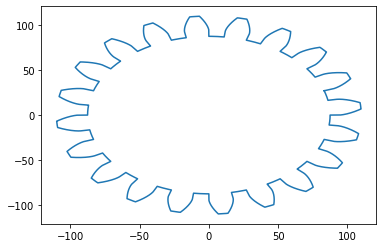

In [1]:
import matplotlib.pyplot as plt
from math import cos,sin,pi,atan
import numpy as np

def rotat_mat(k):                                                #Matrix to Rotate Points by an Angle k
    a=np.array([[cos(k),-sin(k)],[sin(k),cos(k)]])
    return a

def arc(r,t1,t2):                                               #Returns Points of an arc with radius r between t1 and t2                                       
    points=np.array([[],[]])
    t=t1+0.001

    while (t1<t<=t2):
         points=np.concatenate((points,[[r*cos(t)],[r*sin(t)]]),1)
         t=t+0.001

    return points

def line(r1,r2,k):                                             #Returns Points of a radial line with length |r1-r2| at an angle k 
    a=np.array([[r1*cos(k),r2*cos(k)],[r1*sin(k),r2*sin(k)]])
    return a
    


In [ ]:
mod = 10                                #Module
N = 20                                  #Number Of Teeth                                       
p = 20 * pi / 180                       #Pressure Angle In Radians
R_pitch=N*mod/2                         #Pitch Radius 
R_base=R_pitch*cos(p)                   #Base Radius
R_add = R_pitch + mod                   #Addendum Radius
R_ded = R_pitch - mod*1.25              #Dedendum Radius
t_t=17.63                               #Tooth Thickness Along Base Circumference
t_left=np.array([[],[]])                #Left Side Points Of Teeth
t_right=np.array([[],[]])               #Right Side Points Of Teeth
t_all=np.array([[],[]])                 #All Teeth Points
inv=np.array([[],[]])                   #Plotting Points Of Involute

t=0
x=R_base
y=0
while True:
        
        t =t+0.001
        x = R_base * (cos(t) + t * sin(t))
        y = R_base * (sin(t) - t * cos(t))
        t_right = np.concatenate((t_right, [[x], [y]]), 1)                           
        if (x*x + y*y > R_add*R_add):      
          break;

t1 = atan(y/x)

t_left = np.flip(np.dot(rotat_mat(t_t/R_base), [t_right[0], t_right[1]*-1]),1)  

t_all = line(R_ded,R_base,0)                                                             # Radial Line connecting dedentum circle and involute curve
t_all = np.concatenate((t_all,t_right,arc(R_add, t1, (t_t/R_base)-t1),t_left),1)         # Tooth
t_all = np.concatenate((t_all,line(R_base, R_ded,17.63/R_base)),1)                                  
t_all = np.concatenate((t_all,arc(R_ded,17.63/R_base, pi*2/ 20)),1)                      # Dedendum Arc

i=1
while (i<=20):                                                                           #Plotting for Each Gear
      t = i*2*pi/N
      inv = np.concatenate((inv, np.dot(rotat_mat(t), t_all)),1)
      i=i+1

plt.plot(inv[0], inv[1])
plt.show()